In [34]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

In [35]:
df = pd.read_csv('/Users/jonaspieper/Documents/GitHub/Compas-recidivism-analysis/notebooks/Jonas/compas-scores-two-years-clean.csv')

In [36]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,score_text,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,Risk of Violence,1,Low,2013-01-26,2013-02-05,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,Low,Risk of Violence,3,Low,2013-06-16,2013-06-16,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,High,Risk of Violence,6,Medium,NaN,NaN,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,Risk of Violence,1,Low,NaN,NaN,0,1102,0,0


In [4]:
columns = ["age", "age_cat", "sex", "race",  #demographics
               "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", #criminal history
               "c_charge_degree", "c_charge_desc", #current charges 
               "two_year_recid"]

X = df[['sex', 'age_cat', 'race', 'juv_fel_count', 'priors_count', 'c_charge_degree', 'score_text', 'v_score_text']]
y = df['two_year_recid']
feature_cols = ['sex', 'age_cat', 'race', 'juv_fel_count', 'priors_count', 'c_charge_degree', 'score_text', 'v_score_text']

NameError: name 'df' is not defined

In [38]:
X.head()

,sex,age_cat,race,juv_fel_count,priors_count,c_charge_degree,score_text,v_score_text
0,Male,Greater than 45,Other,0,0,F,Low,Low
1,Male,25 - 45,African-American,0,0,F,Low,Low
2,Male,Less than 25,African-American,0,4,F,Low,Low
3,Male,Less than 25,African-American,0,1,F,High,Medium
4,Male,25 - 45,Other,0,2,F,Low,Low


In [39]:
#label encoding non-interger labels
le = LabelEncoder()

In [40]:
X['sex_l'] = le.fit_transform(X['sex'])
X['age_cat_l'] = le.fit_transform(X['age_cat'])
X['race_l'] = le.fit_transform(X['race'])
X['c_charge_degree_l'] = le.fit_transform(X['c_charge_degree'])
X['score_text_l'] = le.fit_transform(X['score_text'])
X['v_score_text_l'] = le.fit_transform(X['v_score_text'])

<ipython-input-40-0e4d7491b083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex_l'] = le.fit_transform(X['sex'])
<ipython-input-40-0e4d7491b083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_cat_l'] = le.fit_transform(X['age_cat'])
<ipython-input-40-0e4d7491b083>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [41]:
fullX = X

In [42]:
X = X.drop(labels = ['sex', 'age_cat', 'race', 'c_charge_degree', 'score_text', 'v_score_text'], axis = 'columns')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [49]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5)

In [50]:
clf = clf.fit(X_train,y_train)

In [51]:
y_pred = clf.predict(X_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6911528150134049


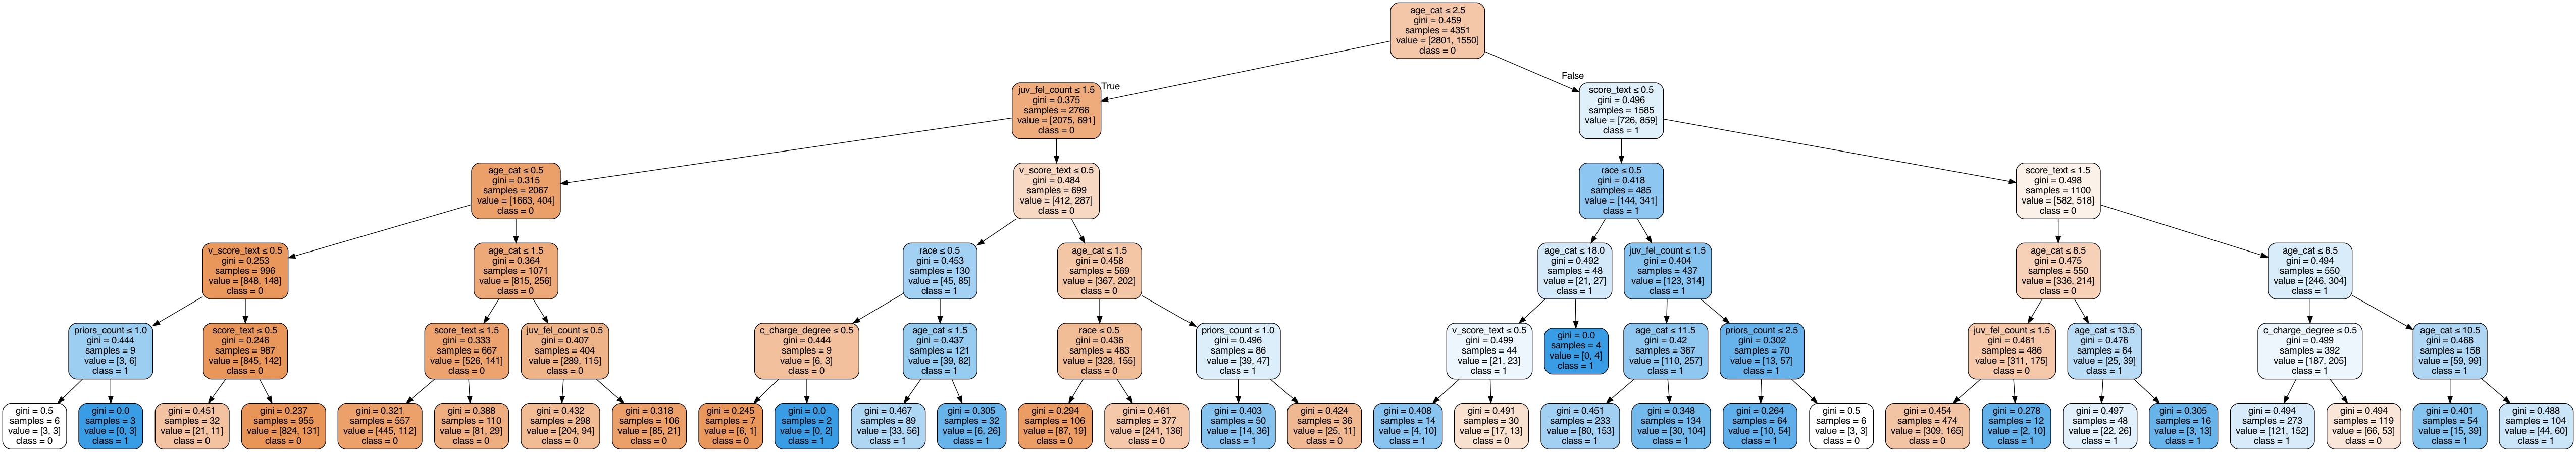

In [48]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())